<a href="https://colab.research.google.com/github/parmidamardi/CDM-MatrixMonitor-FP/blob/main/CDM%E2%80%91MatrixMonitor%E2%80%91FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%pip install pandas numpy matplotlib seaborn openpyxl mlxtend scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, FastICA, TruncatedSVD

from sklearn.feature_selection import SelectKBest, f_regression, chi2, RFE

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, silhouette_score


In [31]:
cancer = load_breast_cancer()
diabetes = load_diabetes()
iris = load_iris()

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [32]:
print("=== Breast Cancer Dataset ===")
print("Shape:", df_cancer.shape)
print("Columns:", list(df_cancer.columns))
print(df_cancer.describe(), "\n")

=== Breast Cancer Dataset ===
Shape: (569, 31)
Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000 

In [33]:
print("=== Diabetes Dataset ===")
print("Shape:", df_diabetes.shape)
print("Columns:", list(df_diabetes.columns))
print(df_diabetes.describe(), "\n")

=== Diabetes Dataset ===
Shape: (442, 11)
Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

       ...            s3            s4            s5            s6      target  
count  ...  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  
m

In [34]:
print("=== Iris Dataset ===")
print("Shape:", df_iris.shape)
print("Columns:", list(df_iris.columns))
print(df_iris.describe(), "\n")

=== Iris Dataset ===
Shape: (150, 5)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%      

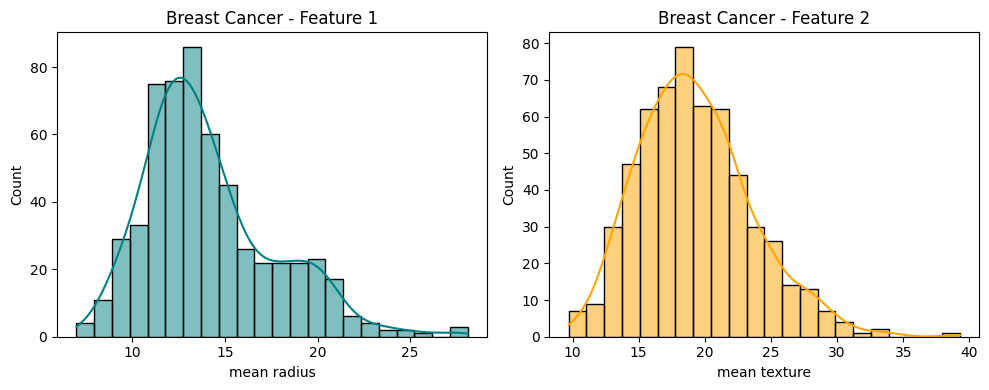

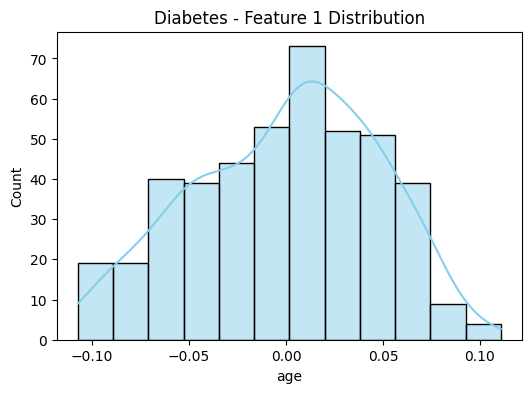

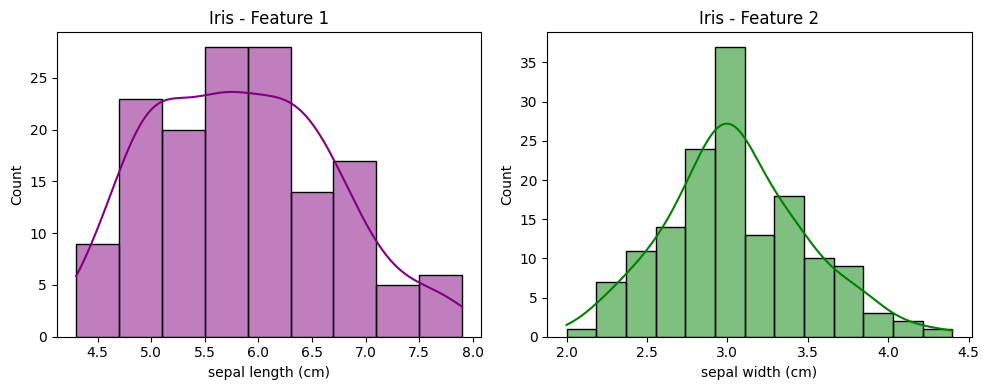

In [35]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_cancer.iloc[:, 0], kde=True, color='teal')
plt.title("Breast Cancer - Feature 1")
plt.subplot(1, 2, 2)
sns.histplot(df_cancer.iloc[:, 1], kde=True, color='orange')
plt.title("Breast Cancer - Feature 2")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_diabetes.iloc[:, 0], kde=True, color='skyblue')
plt.title("Diabetes - Feature 1 Distribution")
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_iris.iloc[:, 0], kde=True, color='purple')
plt.title("Iris - Feature 1")
plt.subplot(1, 2, 2)
sns.histplot(df_iris.iloc[:, 1], kde=True, color='green')
plt.title("Iris - Feature 2")
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


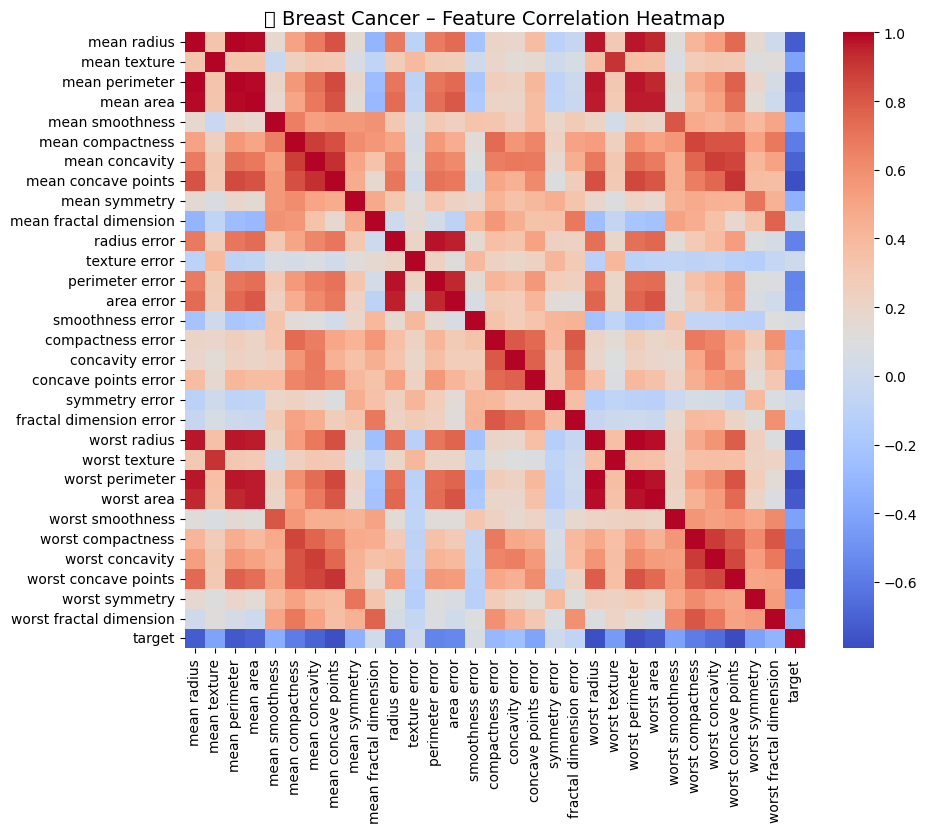

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


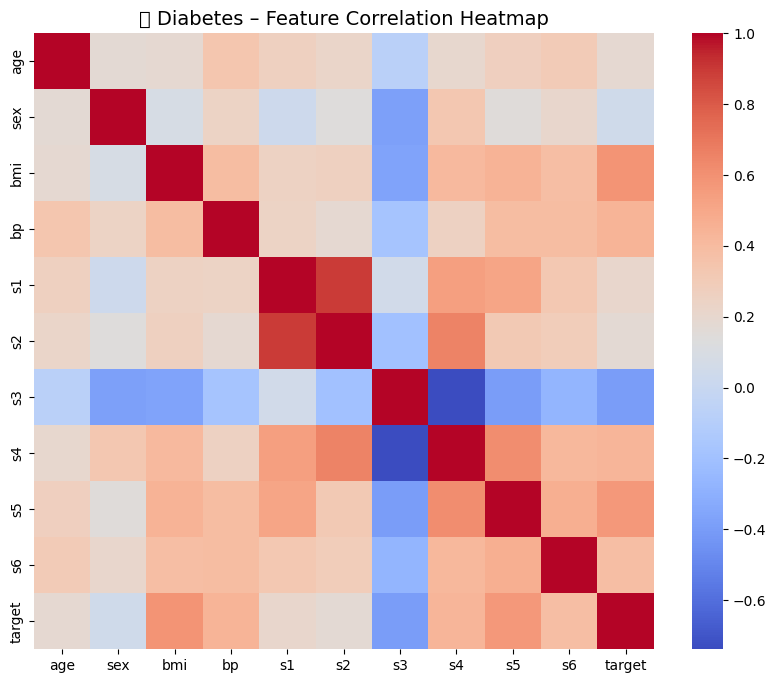

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


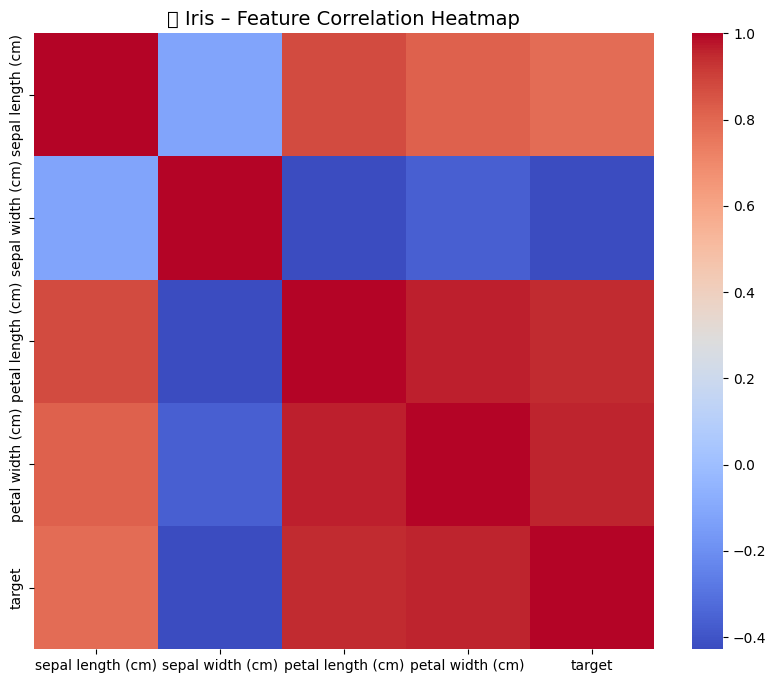

In [36]:
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
    plt.title(title, fontsize=14)
    plt.show()

plot_heatmap(df_cancer, "🔬 Breast Cancer – Feature Correlation Heatmap")
plot_heatmap(df_diabetes, "💉 Diabetes – Feature Correlation Heatmap")
plot_heatmap(df_iris, "🌸 Iris – Feature Correlation Heatmap")

In [37]:
def run_dim_reduction(df, method_name, model):
    X = df.drop(columns=['target'])
    reduced = model.fit_transform(X)
    print(f"\n{method_name} for dataset ({df.shape[0]} samples, {df.shape[1]-1} features):")
    if hasattr(model, "explained_variance_ratio_"):
        print("  Explained variance ratios:", model.explained_variance_ratio_.round(4))
        print("  Cumulative variance:", model.explained_variance_ratio_.sum().round(4))
    else:
        print("  Explained variance not available (ICA)")
    return pd.DataFrame(reduced)


Breast Cancer Dataset

PCA for dataset (569 samples, 30 features):
  Explained variance ratios: [0.982]
  Cumulative variance: 0.982

ICA for dataset (569 samples, 30 features):
  Explained variance not available (ICA)

SVD for dataset (569 samples, 30 features):
  Explained variance ratios: [0.9744]
  Cumulative variance: 0.9744


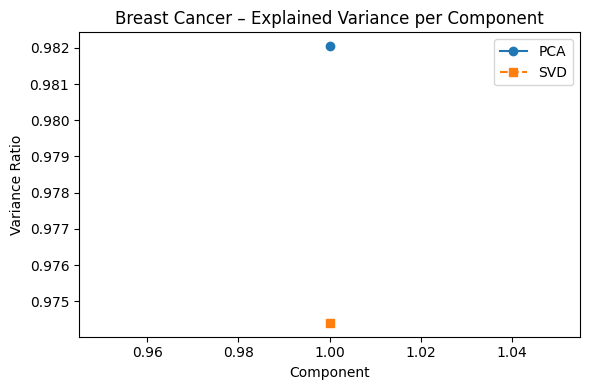


Diabetes Dataset

PCA for dataset (442 samples, 10 features):
  Explained variance ratios: [0.4024 0.1492 0.1206 0.0955 0.0662 0.0603 0.0537 0.0434]
  Cumulative variance: 0.9913

ICA for dataset (442 samples, 10 features):
  Explained variance not available (ICA)

SVD for dataset (442 samples, 10 features):
  Explained variance ratios: [0.4024 0.1492 0.1206 0.0955 0.0662 0.0603 0.0537 0.0434]
  Cumulative variance: 0.9913


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


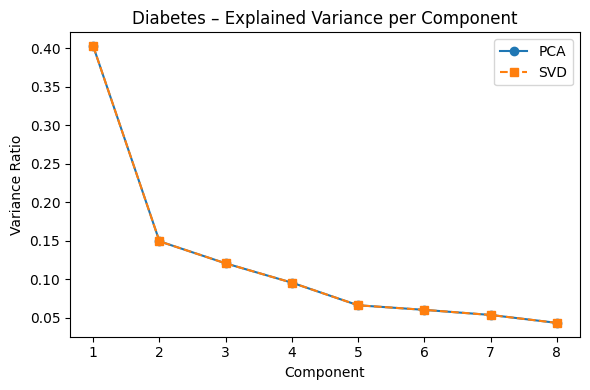


Iris Dataset

PCA for dataset (150 samples, 4 features):
  Explained variance ratios: [0.9246 0.0531]
  Cumulative variance: 0.9777

ICA for dataset (150 samples, 4 features):
  Explained variance not available (ICA)

SVD for dataset (150 samples, 4 features):
  Explained variance ratios: [0.5288 0.4485]
  Cumulative variance: 0.9772


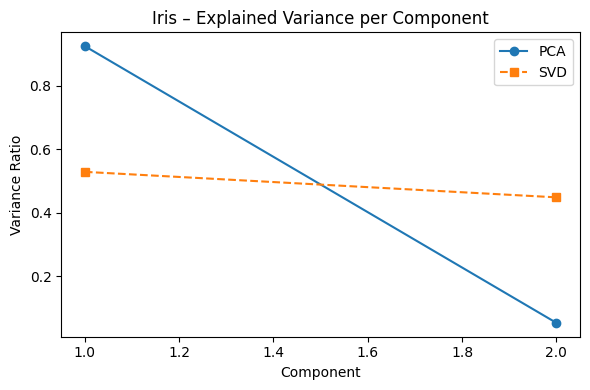

In [38]:
datasets = {
    "Breast Cancer": df_cancer,
    "Diabetes": df_diabetes,
    "Iris": df_iris
}

for name, df in datasets.items():
    print(f"\n{'='*50}\n{name} Dataset")

    # PCA
    pca = PCA(n_components=0.95)
    df_pca = run_dim_reduction(df, "PCA", pca)

    # ICA
    n_comp = df_pca.shape[1]
    ica = FastICA(n_components=n_comp, random_state=42)
    df_ica = run_dim_reduction(df, "ICA", ica)

    # SVD
    svd = TruncatedSVD(n_components=n_comp)
    df_svd = run_dim_reduction(df, "SVD", svd)

    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
             pca.explained_variance_ratio_, "o-", label="PCA")
    plt.plot(range(1, len(svd.explained_variance_ratio_)+1),
             svd.explained_variance_ratio_, "s--", label="SVD")
    plt.title(f"{name} – Explained Variance per Component")
    plt.xlabel("Component")
    plt.ylabel("Variance Ratio")
    plt.legend()
    plt.tight_layout()
    plt.show()



Breast Cancer Dataset – Feature Selection

[SelectKBest] Selected Features (15): ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


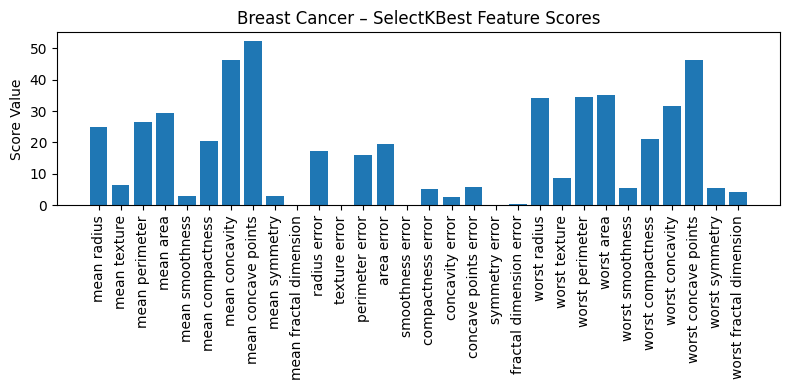

[RFE] Selected Features (15): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']

Overlap between SelectKBest & RFE: ['mean radius', 'radius error', 'mean concavity', 'mean perimeter', 'mean concave points', 'worst concave points', 'mean area', 'worst perimeter', 'worst concavity', 'worst area', 'worst radius']

Diabetes Dataset – Feature Selection

[SelectKBest] Selected Features (5): ['bmi', 'bp', 's3', 's4', 's5']


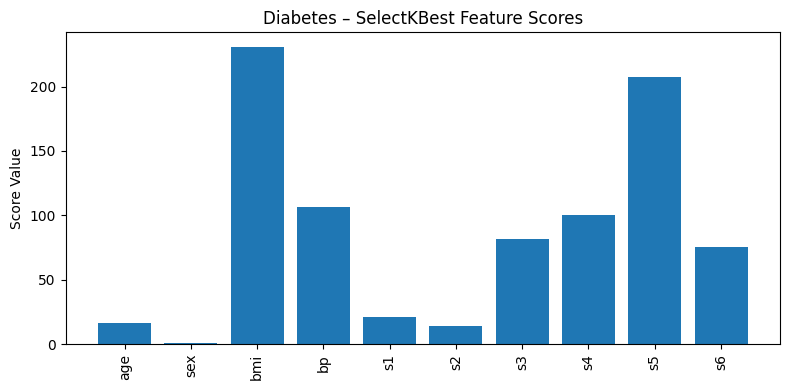

[RFE] Selected Features (5): ['bmi', 'bp', 's1', 's2', 's5']

Overlap between SelectKBest & RFE: ['bmi', 'bp', 's5']

Iris Dataset – Feature Selection

[SelectKBest] Selected Features (2): ['petal length (cm)', 'petal width (cm)']


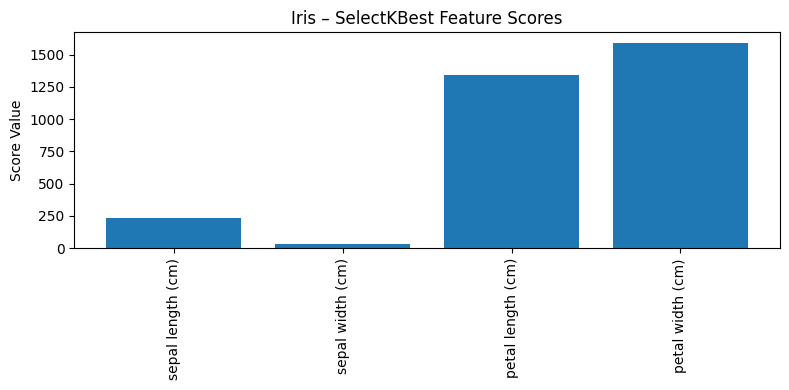

[RFE] Selected Features (2): ['petal length (cm)', 'petal width (cm)']

Overlap between SelectKBest & RFE: ['petal length (cm)', 'petal width (cm)']


In [39]:
for name, df in datasets.items():
    print(f"\n{'='*50}\n{name} Dataset – Feature Selection")

    X = df.drop(columns=['target'])
    y = df['target']

    if name == "Breast Cancer":
        score_func = chi2
        model = LogisticRegression(max_iter=1000)
    elif name == "Diabetes":
        score_func = f_regression
        model = LinearRegression()
    else:
        score_func = f_regression
        model = LinearRegression()

    X_scaled = MinMaxScaler().fit_transform(X)

    # --- SelectKBest ---
    selector = SelectKBest(score_func=score_func, k=int(X.shape[1]/2))
    X_selected = selector.fit_transform(X_scaled, y)
    selected_features = X.columns[selector.get_support()]
    scores = selector.scores_

    print(f"\n[SelectKBest] Selected Features ({len(selected_features)}): {list(selected_features)}")

    plt.figure(figsize=(8,4))
    plt.bar(X.columns, scores)
    plt.xticks(rotation=90)
    plt.title(f"{name} – SelectKBest Feature Scores")
    plt.ylabel("Score Value")
    plt.tight_layout()
    plt.show()

    # --- RFE ---
    rfe = RFE(estimator=model, n_features_to_select=int(X.shape[1]/2))
    rfe.fit(X_scaled, y)
    rfe_features = X.columns[rfe.support_]

    print(f"[RFE] Selected Features ({len(rfe_features)}): {list(rfe_features)}")

    overlap = set(selected_features) & set(rfe_features)
    print(f"\nOverlap between SelectKBest & RFE: {list(overlap)}")

In [41]:
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, pred),
        "F1": f1_score(y_test, pred)
    }

def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "R²": r2_score(y_test, pred),
        "RMSE": mean_squared_error(y_test, pred, squared=False)
    }

def evaluate_clustering(model, X):
    labels = model.fit_predict(X)
    return {"Silhouette": silhouette_score(X, labels)}

In [42]:
results = {}

for name, df in datasets.items():
    print(f"\n{'='*60}\n{name} – Training & Optimization")

    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if name == "Breast Cancer":
        model = RandomForestClassifier(random_state=42)
        res_main = evaluate_classification(model, X_scaled, X_test_scaled, y_train, y_test)

    elif name == "Diabetes":
        model = RandomForestRegressor(random_state=42)
        res_main = evaluate_regression(model, X_scaled, X_test_scaled, y_train, y_test)

    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_main = evaluate_clustering(model, scaler.fit_transform(X))

    pca = PCA(n_components=0.95)
    X_pca_train = pca.fit_transform(X_scaled)
    X_pca_test = pca.transform(X_test_scaled)
    if name == "Breast Cancer":
        model = RandomForestClassifier(random_state=42)
        res_pca = evaluate_classification(model, X_pca_train, X_pca_test, y_train, y_test)
    elif name == "Diabetes":
        model = RandomForestRegressor(random_state=42)
        res_pca = evaluate_regression(model, X_pca_train, X_pca_test, y_train, y_test)
    else:
        model = KMeans(n_clusters=3, random_state=42)
        res_pca = evaluate_clustering(model, scaler.fit_transform(X_pca_train))

    if name == "Breast Cancer":
        select = SelectKBest(score_func=chi2, k=int(X.shape[1]/2))
        X_sel_train = select.fit_transform(np.abs(X_scaled), y_train)
        X_sel_test = select.transform(np.abs(X_test_scaled))
        model = LogisticRegression(max_iter=1000)
        res_sel = evaluate_classification(model, X_sel_train, X_sel_test, y_train, y_test)

    elif name == "Diabetes":
        select = SelectKBest(score_func=f_regression, k=int(X.shape[1]/2))
        X_sel_train = select.fit_transform(X_scaled, y_train)
        X_sel_test = select.transform(X_test_scaled)
        model = LinearRegression()
        res_sel = evaluate_regression(model, X_sel_train, X_sel_test, y_train, y_test)

    else:
        select = SelectKBest(score_func=f_regression, k=int(X.shape[1]/2))
        X_sel = select.fit_transform(scaler.fit_transform(X), y)
        model = KMeans(n_clusters=3, random_state=42)
        res_sel = evaluate_clustering(model, X_sel)

    results[name] = {"Main": res_main, "PCA": res_pca, "Selected": res_sel}



Breast Cancer – Training & Optimization

Diabetes – Training & Optimization

Iris – Training & Optimization


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Breast Cancer Results Comparison:
 Main: {'Accuracy': 0.965034965034965, 'F1': 0.9720670391061451}
 PCA: {'Accuracy': 0.958041958041958, 'F1': 0.9659090909090908}
 Selected: {'Accuracy': 0.7762237762237763, 'F1': 0.831578947368421}


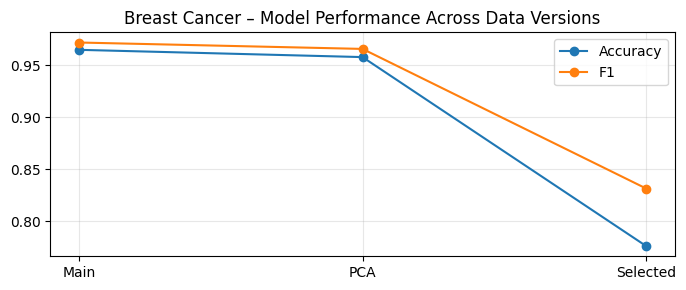


Diabetes Results Comparison:
 Main: {'R²': 0.45547329638673595, 'RMSE': 54.87316063120164}
 PCA: {'R²': 0.4792588589932838, 'RMSE': 53.66131730375965}
 Selected: {'R²': 0.47686421388800526, 'RMSE': 53.784557443406}


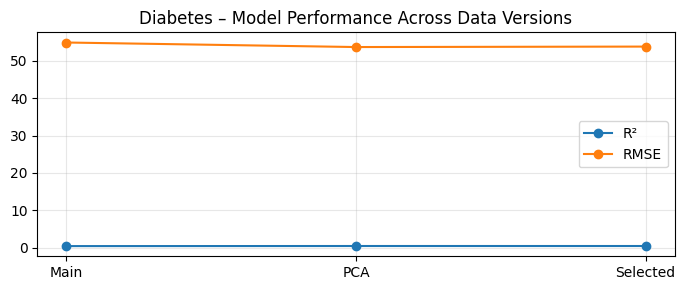


Iris Results Comparison:
 Main: {'Silhouette': 0.45994823920518635}
 PCA: {'Silhouette': 0.48948180200627917}
 Selected: {'Silhouette': 0.6741313114151009}


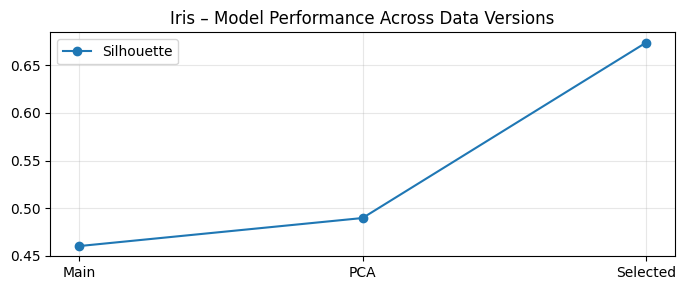

In [43]:
for name, metrics in results.items():
    print(f"\n{name} Results Comparison:")
    for version, vals in metrics.items():
        print(f" {version}: {vals}")

    plt.figure(figsize=(7,3))
    keys = list(metrics["Main"].keys())
    for k in keys:
        vals = [metrics[v].get(k, np.nan) for v in metrics]
        plt.plot(["Main", "PCA", "Selected"], vals, marker='o', label=k)
    plt.title(f"{name} – Model Performance Across Data Versions")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()